# Doing Data Science. NY Times Advertisement Data in May 2012 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://stat.columbia.edu/~rachel/datasets/nyt1.csv')

In [6]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54


In [3]:
labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
age_group = pd.cut(df['Age'], np.array([0, 18, 25, 35, 45, 55, 65, 109]), include_lowest=True, right=False, labels=labels)
df['age_group'] = age_group

In [4]:
group =df.groupby(['age_group']).sum()

# 年齢別、男女別のImpressionの比較

In [4]:
df_man = df.where(df['Gender']==1)

In [20]:
group['Imp_man'] = df_man.groupby('age_group').apply(lambda x : x['Impressions'].sum())

In [21]:
group['Imp_wman'] = df.where(df['Gender']==0).groupby('age_group').apply(lambda x:x['Impressions'].sum())

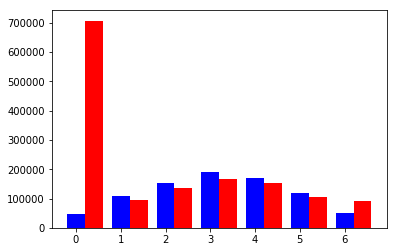

In [24]:
imp_m = group['Imp_man']
imp_w = group['Imp_wman']
idx = np.arange(7)
w = 0.4
plt.bar(idx, imp_m, width=w, color='b', label='Imp_man')
plt.bar(idx+w, imp_w, width=w, color='r', label='Imp_wman')
plt.show()

若者と年寄りだけ女性のImpが多い。。？？理由がようわからん。

# 年齢別、男女別のクリックの比較

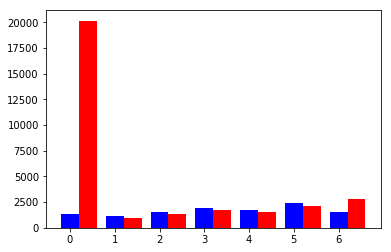

In [6]:
group['Clik_man'] = df.where(df['Gender']==1).groupby('age_group').apply(lambda x:x['Clicks'].sum())
group['Clik_wman'] = df.where(df['Gender']==0).groupby('age_group').apply(lambda x:x['Clicks'].sum())
idx = np.arange(7)
w = 0.4
plt.bar(idx, group['Clik_man'], width=w, color='b', label='Cl_man')
plt.bar(idx+w, group['Clik_wman'], width=w, color='r', label='Cl_wman')
plt.show()

impとだいたいおなじ感じ。

# Signed Inの特徴を調べる

## SignedとUnsignedの比較

<BarContainer object of 2 artists>

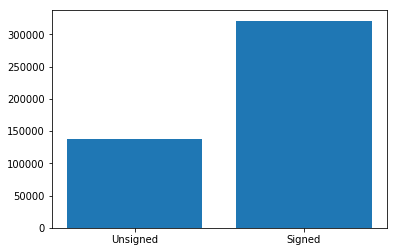

In [10]:
signed_in = [df['Signed_In'].where(df['Signed_In']==0).count(), df['Signed_In'].where(df['Signed_In']==1).count()]
label = ['Unsigned', 'Signed']
plt.bar(label, signed_in)

圧倒的Signed.

## 男女別

In [21]:
group_signed_man = df.where(df['Gender']==1).groupby('Signed_In').apply(lambda x:x['Signed_In'].count())
group_signed_wman = df.where(df['Gender']==0).groupby('Signed_In').apply(lambda x:x['Signed_In'].count())

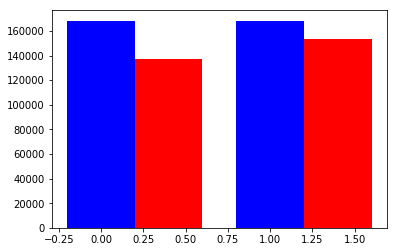

In [24]:
idx = np.arange(2)
w = 0.4
plt.bar(idx, group_signed_man, width=w, color='b', label='Signed_man')
plt.bar(idx+w, group_signed_wman, width=w, color='r', label='Signed_wman')
plt.show()

In [31]:
a = df.where(df['Gender']==0).groupby('Signed_In').sum()
b = df.where(df['Gender']==1).groupby('Signed_In').sum()
print(a)
print(b)

                 Age  Gender  Impressions   Clicks
Signed_In                                         
0.0              0.0     0.0     685483.0  19480.0
1.0        6646810.0     0.0     767299.0  11192.0
                 Age    Gender  Impressions   Clicks
Signed_In                                           
1.0        6869200.0  168265.0     842777.0  11777.0


男は皆サインインしてる。女は半々くらい。

## 年齢別比較

In [35]:
c = df.where(df['Gender']==0).groupby('age_group').apply(lambda x : x['Signed_In'].sum()/x['Signed_In'].count())
c

age_group
18-24    1.000000
25-34    1.000000
35-44    1.000000
45-54    1.000000
55-64    1.000000
65+      1.000000
<18      0.030806
dtype: float64

サインインしてないの全部未成年。未成年はほとんどサインインしてない。

## ImpressionとClickの比較

未成年かつ女性に限定して調べます。

#### Impression

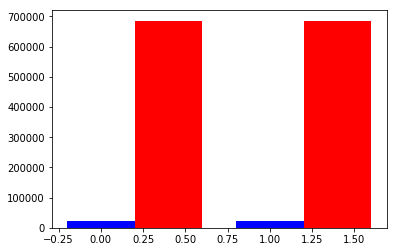

In [44]:
df_temp = df.where((df['age_group']=='<18') & (df['Gender']==0))
df_click_signed = df_temp.where(df['Signed_In']==1).groupby('Signed_In').apply(lambda x : x['Impressions'].sum())
df_click_unsigned = df_temp.where(df['Signed_In']==0).groupby('Signed_In').apply(lambda x : x['Impressions'].sum())

idx = np.arange(2)
w = 0.4
plt.bar(idx, df_click_signed, width=w, color='b', label='Signed')
plt.bar(idx+w, df_click_unsigned, width=w, color='r', label='Unsigned')
plt.show()

サインインしてないやつらのImpが圧倒的！！！

#### Click

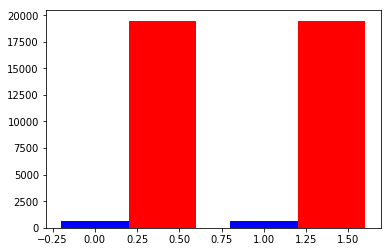

In [45]:
df_temp = df.where((df['age_group']=='<18') & (df['Gender']==0))
df_click_signed = df_temp.where(df['Signed_In']==1).groupby('Signed_In').apply(lambda x : x['Clicks'].sum())
df_click_unsigned = df_temp.where(df['Signed_In']==0).groupby('Signed_In').apply(lambda x : x['Clicks'].sum())

idx = np.arange(2)
w = 0.4
plt.bar(idx, df_click_signed, width=w, color='b', label='Signed')
plt.bar(idx+w, df_click_unsigned, width=w, color='r', label='Unsigned')
plt.show()

Clickも同様。